In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [2]:
datarute = r'C:\Users\ZIGH\Documents\ENSEA\VR\Project\Dataset\UTKFace' 

In [3]:
image_paths = []
age_labels = []
gender_labels = []

for filename in os.listdir(datarute):
    image_path = os.path.join(datarute, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [4]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,C:\Users\ZIGH\Documents\ENSEA\VR\Project\Datas...,100,0
1,C:\Users\ZIGH\Documents\ENSEA\VR\Project\Datas...,100,0
2,C:\Users\ZIGH\Documents\ENSEA\VR\Project\Datas...,100,1
3,C:\Users\ZIGH\Documents\ENSEA\VR\Project\Datas...,100,1
4,C:\Users\ZIGH\Documents\ENSEA\VR\Project\Datas...,100,1


In [5]:
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features


In [7]:
X = extract_features(df['image'])

In [8]:
X.shape

(23708, 128, 128, 1)

In [9]:
X = X/255.0

In [10]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [11]:
age_ranges = [(0, 2), (3, 5), (6, 12), (13, 17), (18, 24), (25, 34), (35, 44), (45, 54), (55, 64), (65, 74), (75, 100)]

def age_to_range(age):
    for i, age_range in enumerate(age_ranges):
        if age >= age_range[0] and age <= age_range[1]:
            return i
    return len(age_ranges) - 1

y_age_range = np.array([age_to_range(age) for age in y_age])

In [12]:
input_shape = (128, 128, 1)

In [13]:
TrainedModel = load_model(r"C:\Users\ZIGH\Documents\ENSEA\VR\Project\Models\Age&Gender2.h5")

1/1 [==============================] - 0s 73ms/step
Original Gender: 1 Original Age Range: (25, 34)
Predicted Gender: 1
Probabilities for each age range:


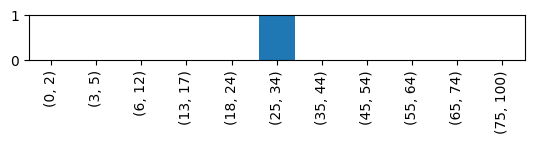

In [34]:
image_index = 12234
pred = TrainedModel.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = round(pred[0][0][0])
age_probs = pred[1][0]

print("Original Gender:", y_gender[image_index], "Original Age Range:", age_ranges[age_to_range(y_age[image_index])])
print("Predicted Gender:", pred_gender)
print("Probabilities for each age range:")

probability = []
for i, prob in enumerate(age_probs):
    # print("Age Range {}: {}".format(age_ranges[i], prob))
    probability.append(prob)


# Crear una lista de índices para etiquetar cada barra
indices = range(len(probability))

# Crear la gráfica de barras horizontales
plt.bar(indices, probability)
plt.xticks(indices, [age_ranges[i] for i in range(len(probability))], rotation='vertical')

# Ajustar los límites de la gráfica
plt.ylim([0, 1.0])
plt.xlim([-0.5, len(probability)-0.5])

# plt.show()
import cv2 
fig = plt.gcf()
fig.canvas.draw()
random = cv2.resize(np.array(fig.canvas.renderer.buffer_rgba()),(540,540))
plt.imshow(random)

# plt.axis('off')
# plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [47]:
imageprub = os.path.join('./', r'C:\Users\ZIGH\Documents\ENSEA\VR\Project\Imagenes\111.jpeg')
imgprub = Image.open(imageprub).convert('L')
imgprub = imgprub.resize((128, 128), Image.ANTIALIAS)
imgprub = np.array(imgprub)

# Normalizar la imagen (dividir por 255 para que los valores de píxeles estén en el rango [0, 1])
imgprub_normalized = imgprub / 255.0

1/1 [==============================] - 0s 139ms/step
Predicted Gender: 1
Probabilities for each age range:


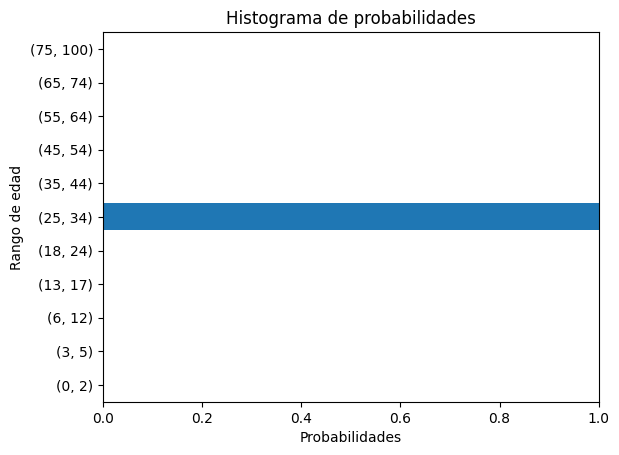

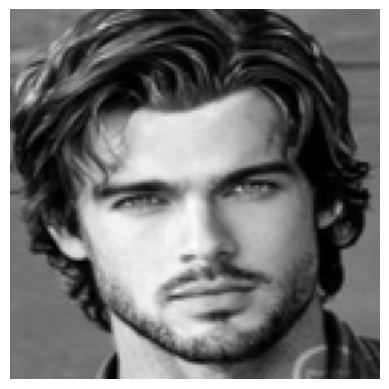

In [49]:
pred = TrainedModel.predict(imgprub_normalized.reshape(1, 128, 128, 1))
pred_gender = round(pred[0][0][0])
age_probs = pred[1][0]

print("Predicted Gender:", pred_gender)
print("Probabilities for each age range:")

probability = []
# for i, prob in enumerate(age_probs):
#     # print("Age Range {}: {}".format(age_ranges[i], prob))
#     probability.append(prob)

[probability.append(prob) for prob in age_probs]


# Crear una lista de índices para etiquetar cada barra
indices = range(len(probability))

# Crear la gráfica de barras horizontales
plt.barh(indices, probability)
plt.xlabel('Probabilidades')
plt.ylabel('Rango de edad')
plt.title('Histograma de probabilidades')
plt.yticks(range(len(probability)), [age_ranges[i] for i in range(len(probability))])

# Ajustar los límites de la gráfica
plt.xlim([0, 1.0])
plt.ylim([-0.5, len(probability)-0.5])

plt.show()

plt.axis('off')
plt.imshow(imgprub_normalized.reshape(128, 128), cmap='gray')
